<a href="https://colab.research.google.com/github/anuanth/brain-tumor-classification/blob/main/brain_tumor_mri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization
from keras import backend as K
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.listdir('/content/drive/MyDrive/MRI-Scan')

['no', 'yes']

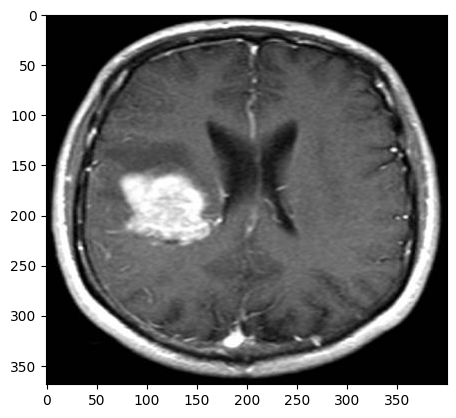

In [ ]:
import cv2
directory = '/content/drive/MyDrive/MRI-Scan'
category=["yes","no"]
for cat in category:
    path=os.path.join(directory,cat)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

 (369, 400)


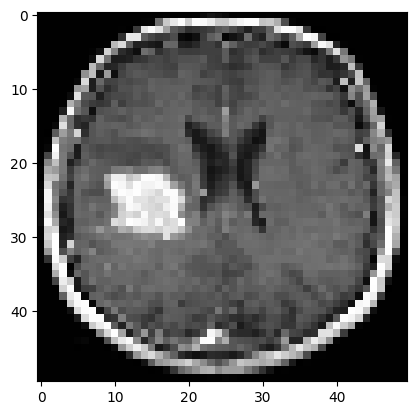

In [ ]:
print("",img_array.shape)
new_array=cv2.resize(img_array,(50,50))
plt.imshow(new_array,cmap="gray")
plt.show()

In [ ]:
enc = OneHotEncoder()
enc.fit([[0], [1]])
def names(number):
    if(number == 0):
        return 'Tumor'
    else:
        return 'Normal'


In [ ]:
data = []
paths = []
ans = []
for r, d, f in os.walk('/content/drive/MyDrive/MRI-Scan/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[0]]).toarray())

In [ ]:
paths = []
for r, d, f in os.walk("/content/drive/MyDrive/MRI-Scan/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    x = img.resize((128,128))
    x = np.array(x)
    if(x.shape == (128,128,3)):
        data.append(np.array(x))
        ans.append(enc.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
ans = np.array(ans)
ans = ans.reshape(139,2)

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='selu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='selu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adadelta',metrics=['accuracy'])
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, ans, test_size=0.2, shuffle=True, random_state=69)

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=40, verbose=1,validation_data=(x_test, y_test))

Epoch 1/30
3/3 [==============================] - 12s 2s/step - loss: 1.8374 - accuracy: 0.5045 - val_loss: 2.5211 - val_accuracy: 0.5714
Epoch 2/30
3/3 [==============================] - 8s 3s/step - loss: 1.4299 - accuracy: 0.5766 - val_loss: 1.9760 - val_accuracy: 0.6071
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 1.4010 - accuracy: 0.5495 - val_loss: 1.7127 - val_accuracy: 0.6429
Epoch 4/30
3/3 [==============================] - 7s 2s/step - loss: 1.1449 - accuracy: 0.6036 - val_loss: 1.6766 - val_accuracy: 0.6786
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 1.2363 - accuracy: 0.5676 - val_loss: 1.8859 - val_accuracy: 0.6786
Epoch 6/30
3/3 [==============================] - 7s 2s/step - loss: 1.2692 - accuracy: 0.6306 - val_loss: 1.6566 - val_accuracy: 0.6786
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 1.0286 - accuracy: 0.7027 - val_loss: 1.9273 - val_accuracy: 0.6429
Epoch 8/30
3/3 [========================

In [ ]:
from keras.models import model_from_json
model_json = model.to_json()
with open("braintumormodel.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("braintumormodel.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from tensorflow.keras.models import model_from_json
json_file = open('braintumormodel.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("braintumormodel.h5")
print("Loaded model from disk")

Loaded model from disk


99.78482723236084% Confidence This Is Tumor


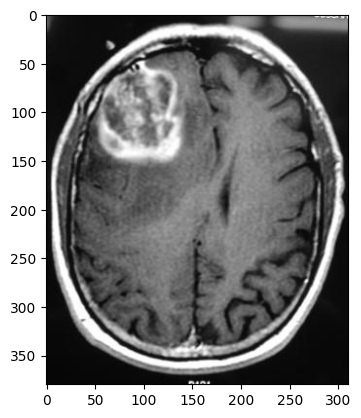

In [ ]:
img = Image.open('/content/drive/MyDrive/yes/Y15.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = loaded_model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))

83.32275152206421% Confidence This Is Normal


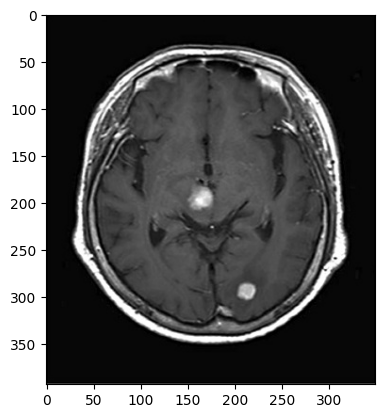

In [ ]:
img = Image.open('/content/drive/MyDrive/no/N17.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
answ = loaded_model.predict_on_batch(x)
classification = np.where(answ == np.amax(answ))[1][0]
imshow(img)
print(str(answ[0][classification]*100) + '% Confidence This Is ' + names(classification))